## Exploratory Data Analysis for the Dataset

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

#### Import Dataset into a Pandas DataFrame

In [2]:
df = pd.read_csv('data/cardekho.csv')
data = df.copy()

#### Inspect the first 5 Rows of the Dataset

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


#### Inspect Dataset shape

In [5]:
df.shape

(8128, 12)

The dataset loaded above has 12 columns and 8128 rows of data. 


#### Check for Missing Values

In [9]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

The columns with rows of missing data are owner, mileage, engine, max_power, seats

#### Checking for duplicate rows

In [10]:
df.duplicated().sum()

1202

There are 1202 duplicated values in the dataset

##### Checking for Dataset information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [13]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In the stats above, the max selling price is 10,000,000 while the min selling price is 29,999. The average selling price is
638,271. However, this might be because of the presence of outliers as the max selling price. The standard deviation is 806,253, indicating significant variation in prices. 

The year spans from 1983 vehicles to 2020 vehicles.

The mean distance driven is approximately 69,819 km.
The std is 56,551, indicating some variation in distances driven.
The minimum distance is 1 km, while the maximum is 2,360,457 km

The mean mileage is approximately 19.42 km/ltr/kg .
The std is 4.04, indicating some variation in mileage.
The minimum mileage is 0, while the maximum is 42.

The mean engine size is approximately 1458.63 .
The std is 503.92, indicating some variation in engine sizes.
The minimum engine size is 624, while the maximum is 3604.

The mean number of seats is approximately 5.42.
The std is 0.96, indicating relatively little variation in seats.
The minimum number of seats is 2, while the maximum is 14

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

We have 6 categorical features : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']


In [16]:
df["brand"] = df["name"].apply(lambda x: x.split()[0])

### Data Visualization

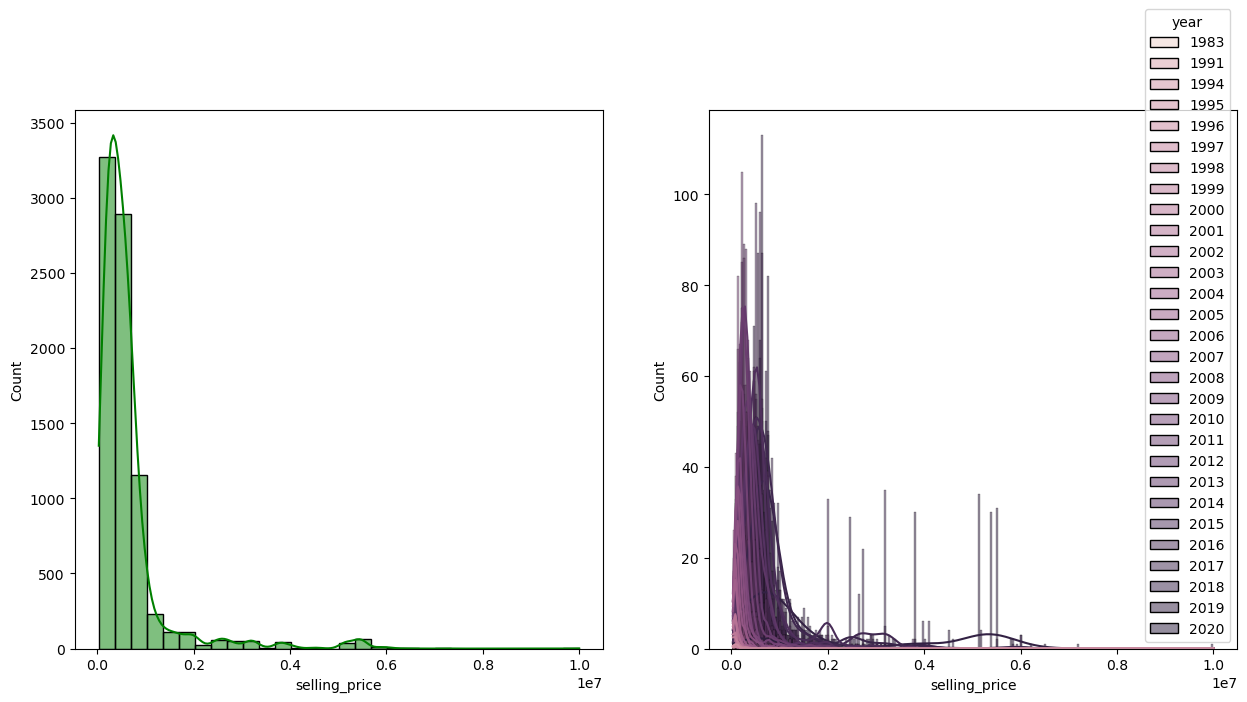

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='selling_price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='selling_price',kde=True,hue='year')
plt.show()

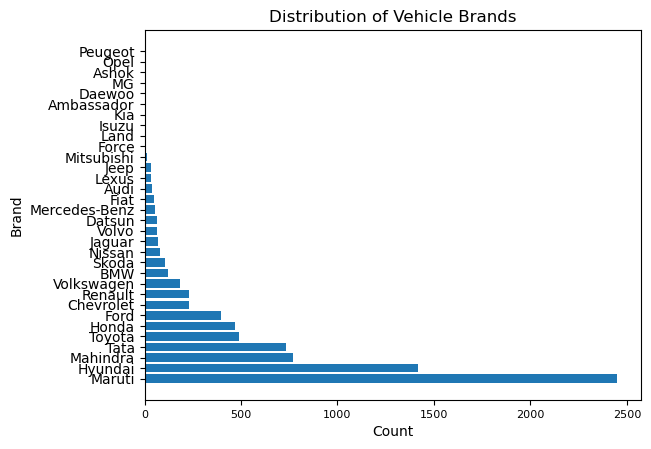

In [23]:
# Count the occurrences of each brand
brand_counts = df['brand'].value_counts()

# Plot the bar chart
plt.barh(brand_counts.index, brand_counts.values)  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Brand')
plt.title('Distribution of Vehicle Brands')
plt.xticks(fontsize=8)  # Smaller font size for x-axis labels
plt.show()

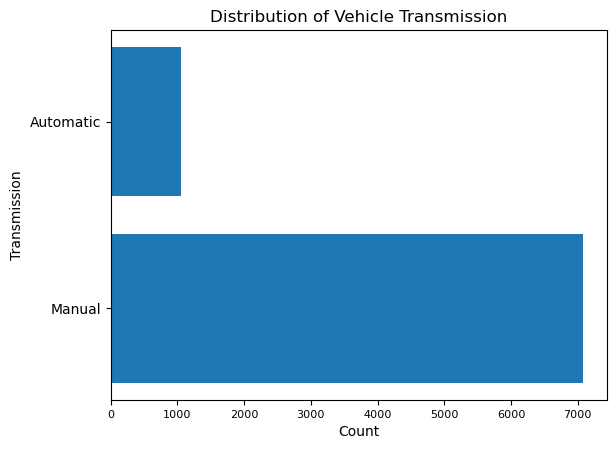

In [25]:
# Count the occurrences of each brand
transmission_counts = df['transmission'].value_counts()

# Plot the bar chart
plt.barh(transmission_counts.index, transmission_counts.values)  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Transmission')
plt.title('Distribution of Vehicle Transmission')
plt.xticks(fontsize=8)  # Smaller font size for x-axis labels
plt.show()

There are more Manual Transmission Vehichles in the Dataset

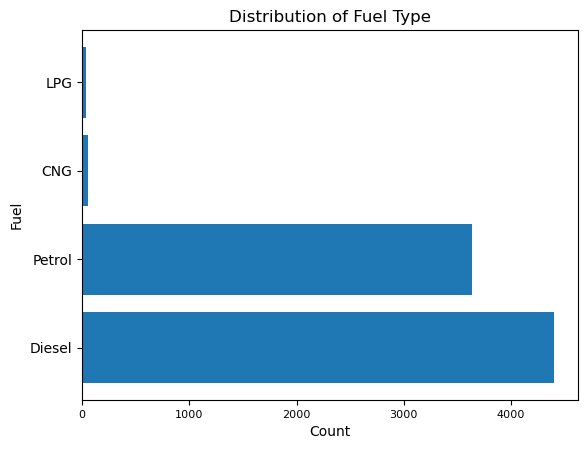

In [26]:
# Count the occurrences of each brand
fuel_counts = df['fuel'].value_counts()

# Plot the bar chart
plt.barh(fuel_counts.index, fuel_counts.values)  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Fuel')
plt.title('Distribution of Fuel Type')
plt.xticks(fontsize=8)  # Smaller font size for x-axis labels
plt.show()

Petrol and Diesel are the most common fuel types in the dataset, with Diesel slightly more than Petrol.CNG and LNG also exist in the dataset

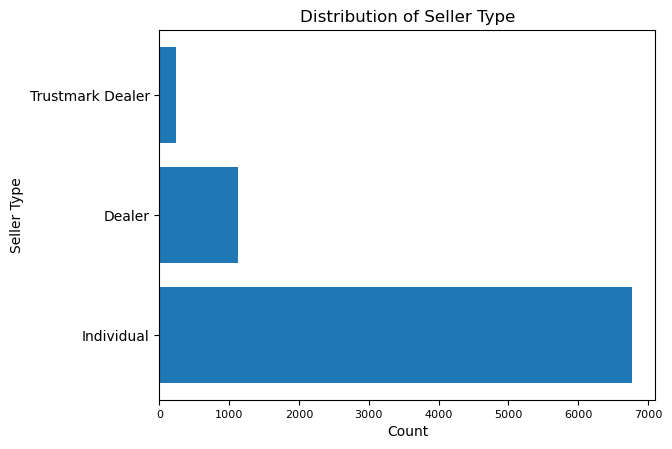

In [27]:
# Count the occurrences of each brand
seller_counts = df['seller_type'].value_counts()

# Plot the bar chart
plt.barh(seller_counts.index, seller_counts.values)  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Seller Type')
plt.title('Distribution of Seller Type')
plt.xticks(fontsize=8)  # Smaller font size for x-axis labels
plt.show()

There are more individuals making sales in the dataset than Dealers and Trustmark Dealer

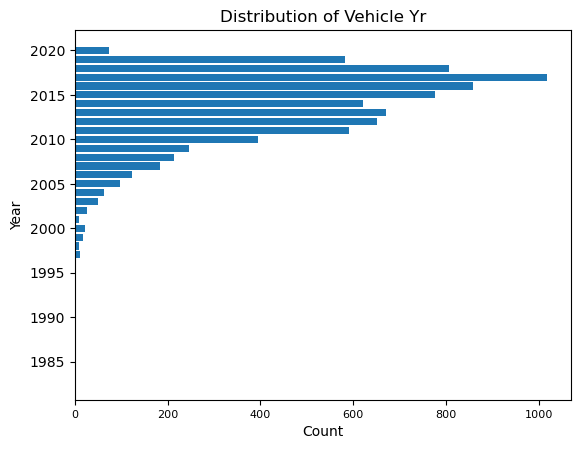

In [28]:
# Count the occurrences of each brand
year_counts = df['year'].value_counts()

# Plot the bar chart
plt.barh(year_counts.index, year_counts.values)  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Distribution of Vehicle Yr')
plt.xticks(fontsize=8)  # Smaller font size for x-axis labels
plt.show()

Most of the cars sold in the dataset range from 2010 to 2019

### Cleaning Dataset

In [29]:
mode = df['mileage(km/ltr/kg)'].mode().iloc[0]
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(mode)

mode = df['engine'].mode().iloc[0]
df['engine'] = df['engine'].fillna(mode)

mode = df['max_power'].mode().iloc[0]
df['max_power'] = df['max_power'].fillna(mode)

mode = df['seats'].mode().iloc[0]
df['seats'] = df['seats'].fillna(mode)

In [30]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brand                 0
dtype: int64

In [31]:
df = df.rename(columns={"mileage(km/ltr/kg)": "mileage", "fuel_CNG": "CNG", "fuel_Diesel": "Diesel", "fuel_LPG": "LPG", "fuel_Petrol": "Petrol",
                        "seller_type_Dealer": "Dealer", "seller_type_Individual": "Individual", "seller_type_Trustmark Dealer": "T_Dealer",
                        "owner_First Owner" : "Owner_1", "owner_Second Owner": "Owner_2", "owner_Third Owner": "Owner_3",
                        "owner_Fourth & Above Owner": "Owner_4", "owner_Test Drive Car": "T_Drive"})

In [32]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti


In [34]:
df_cut = df.drop(['name'], axis = 1)

In [36]:
df_cut

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,Hyundai
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,Maruti
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,Tata


In [37]:
df_cut.to_csv('vehicle_data_cleaned.csv', index=False)